# Exercise 3 - Augmentations

## Objective

In this exercise, you will experiment with the [Albumentations](https://albumentations.ai/docs/) library
to perform different data augmentations. 

## Details

Write down a list of relevant augmentations and store them in the `transforms` variable. You should also
implement a quick script to visualize the batches and check your augmentations.

You can run `python augmentations.py` to display augmented images (in the Desktop window).

## Tips

You should use the `Compose` API to use multiple augmentations. You can find an example of an augmentation
pipeline using `Compose` [here](https://albumentations.ai/docs/examples/example/#define-an-augmentation-pipeline-using-compose-pass-the-image-to-it-and-receive-the-augmented-image).

This [Github repository](https://github.com/albumentations-team/albumentations_examples)
contains different examples of augmentations.

In [3]:
imdir = 'GTSRB/Final_Training/Images'
dataset = image_dataset_from_directory(imdir, 
                                       image_size=(32, 32),
                                       validation_split=0.1,
                                       subset='training',
                                       seed=123,
                                       batch_size=1)
dataset

Found 4300 files belonging to 43 classes.
Using 3870 files for training.


<BatchDataset shapes: ((None, 32, 32, 3), (None,)), types: (tf.float32, tf.int32)>

Found 4300 files belonging to 43 classes.
Using 3870 files for training.


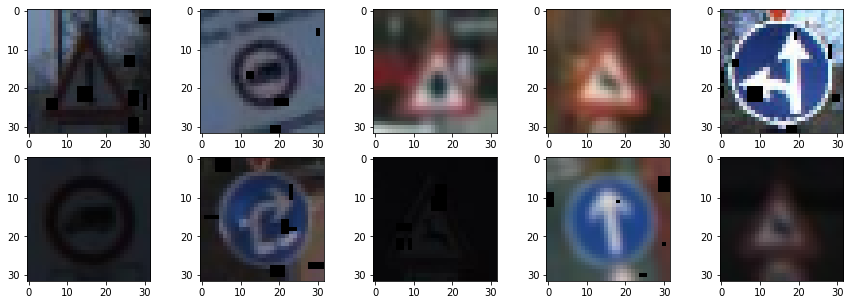

In [21]:
import argparse
from functools import partial

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from utils import plot_batch


# SELECT RELEVANT AUGMENTATIONS
transforms = A.Compose([
    A.Rotate(limit=30, p=0.5),
    A.Blur(blur_limit=3, p=0.5),
#     A.RandomContrast(p=0.5),
    A.CoarseDropout(p=0.5, max_holes=8, max_height=4, max_width=4, min_holes=4, min_height=1, min_width=1)
])


def aug_fn(image):
    """ augment an image """
    aug_data = transforms(image=image.squeeze()) # input array has 4 dimensions, so need to squeeze the 1st one
    aug_img = aug_data["image"]
    aug_img = tf.cast(aug_img/255.0, tf.float32) # cast numpy arr back to tensor
    return aug_img


def process_data(image, label):
    """ wrapper function to apply augmentation """
    # a wrapper of tensorflow numpy function
    aug_img = tf.numpy_function(func=aug_fn, inp=[image], Tout=tf.float32)
    return aug_img, label


if __name__ == '__main__':
#     parser = argparse.ArgumentParser(description='Augment dataset')
#     parser.add_argument('-d', '--imdir', required=True, type=str,
#                         help='data directory')
#     args = parser.parse_args()    

    imdir = 'GTSRB/Final_Training/Images'
    dataset = image_dataset_from_directory(imdir, 
                                           image_size=(32, 32),
                                           validation_split=0.1,
                                           subset='training',
                                           seed=123,
                                           batch_size=1) # when iterating through dataset, element will have 1st dimension equal to 1, so need to squeeze later

    # APPLY AUGMENTATIONS AND DISPLAY BATCHES
    output_dataset = dataset.map(process_data).batch(256)
    for X, Y in output_dataset:
        batch_np = X.numpy()
        plot_batch(batch_np)
        break